In [31]:
#新しい単体でインプットファイルを作るときにdensity.csvとcross_section.txtに情報を書き加える必要があるかないかを調べるプログラム
#l_addに追加したい元素記号を入れると、そのデータがあるかないかを出力してくれる
import math

l_add = ["Fe"]

nist_list = []
density_list = []
cross_section_list = []

#nistから読み取った自然界に存在する核種に関するデータを格納するリスト
natural_element_nist_list = []
natural_comp_list = []
natural_massnum_list = []
natural_saw_list = []

reference = "../reference/"

f = open(reference + "/NIST.txt")
data1 = f.read()
f.close()
lines1 = data1.split("\n") # 改行で区切る(改行文字そのものは戻り値のデータには含まれない)
n=0
for line in lines1:
    n = n + 1
    nist_list.append(line+"  ")
    
f = open(reference + "/density.csv")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split(",")
    density_list.append(s)
    line = f.readline()
f.close

f = open(reference + "/cross_section.txt")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split("\t")
    cross_section_list.append(s)
    line = f.readline()
f.close

#自然界に存在する元素を抽出------------------------------------------------------------------------------
for i in range(math.floor(len(nist_list)/8)):
    if len(nist_list[8*i+4]) != 25:#Isotopic Compositionのデータがあるとき（存在比が有意）
        if nist_list[8*i+2][15] == " ":#質量数が１桁の時
            natural_element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17]+"-"+nist_list[8*i+2][14].rjust(3))
        elif nist_list[8*i+2][16] == " ":#質量数が2桁の時
            natural_element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17]+"-"+(nist_list[8*i+2][14]+nist_list[8*i+2][15]).rjust(3))
        else:#質量数が３桁の時
            natural_element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17]+"-"+nist_list[8*i+2][14]+nist_list[8*i+2][15]+nist_list[8*i+2][16])
        
        #同位体存在比を抽出-----------------
        s=nist_list[8*i+4].split()
        comp = ""
        for k in range(len(s[3])):
            if s[3][k] == "(":
                break
            comp = comp + s[3][k]
        natural_comp_list.append(comp.ljust(10))
        
        
        #原子番号を抽出---------------------
        natural_massnum_list.append(int(nist_list[8*i][16]+nist_list[8*i][17]+nist_list[8*i][18]))
        
        #平均原子量を抽出
        s = nist_list[8*i+5].split()
        saw = ""
        for j in range(len(s[4])):
            if s[4][j] == "(":
                break
            if s[4][j] != "[" and s[4][j] != "]":
                saw = saw + s[4][j]
        if len(saw.split(",")) == 2:
            d = saw.split(",")
            saw = (float(d[0]) + float(d[1]))/2
        natural_saw_list.append(saw)
        
for i in l_add:#単体の元素記号でforを回す
    
    print(i+"-------------")
 
    #自然界に存在する元素でforを回す
    for ii in range(len(natural_element_nist_list)):
        a = ""#質量数（３桁表示）
        for iii in range(3,len(natural_element_nist_list[ii])):
            if natural_element_nist_list[ii][iii] == " ":
                a = a + "0"
            else:
                a = a + natural_element_nist_list[ii][iii]
#         print(a)

        
        b = ""#元素記号
        for iii in range(0,2):
            if natural_element_nist_list[ii][iii] != " ":
                b = b + natural_element_nist_list[ii][iii]
                
        if i + a == "C013":#C13のデータはJENDLにないので、bに0を代入して↓のif分の条件を満たさないようにする
            b = 0
                

        if b == i:#iのforとiiのforの元素記号が一致するとき
#             print(str(natural_massnum_list[ii])+ a + ".50c " + natural_comp_list[ii])
            print(str(natural_massnum_list[ii])+ a + ".50c " + natural_comp_list[ii].strip())

            #cross_section_listから断面積を読み取る
            exsistence = 0
            for iiii in range(len(cross_section_list)):
                if cross_section_list[iiii][0] == b + a :
                    exsistence = 1
                    print("cross_section.txtにデータがあります 断面積=" + str(cross_section_list[iiii][1]))
            if exsistence == 0:
                print("cross_section.txtにデータがありません")
                
                 
    #i（元素記号）と一致する密度データを抜き出す
    exsistence = 0
    for ii in range(len(density_list)):
        if density_list[ii][0] == i:
            exsistence = 1
            print("density.csvにデータがあります　密度=" + str(density_list[ii][1]))
    if exsistence == 0:
        print("density.csvにデータがありません")

            

Fe-------------
26054.50c 0.05845
cross_section.txtにデータがありません
26056.50c 0.91754
cross_section.txtにデータがありません
26057.50c 0.02119
cross_section.txtにデータがありません
26058.50c 0.00282
cross_section.txtにデータがありません
density.csvにデータがありません


In [33]:
#単体用（B,C,Nb,Sn,V,Si,Ti,Al,Pb）のインプットファイルを作る
#新しい元素を増やすときはリストlのリストに追記して、density.csvとcross_section.txtにそれぞれ平均密度と14MeVの全断面積を書き加える
import math
import os


ll= ["B","C","Nb","Sn","V","Si","Ti","Al","Pb"]#インプットファイルをつくる元素


nist_list = []
density_list = []
cross_section_list = []
input_list = []

reference = "../reference/"
f = open(reference + "/S1TC_spectrum.i")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split("\t")
    input_list.append(s[0])
    line = f.readline()
f.close


f = open(reference + "/NIST.txt")
data1 = f.read()
f.close()
lines1 = data1.split("\n") # 改行で区切る(改行文字そのものは戻り値のデータには含まれない)
n=0
for line in lines1:
    n = n + 1
    nist_list.append(line+"  ")
    
f = open(reference + "/density.csv")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split(",")
    density_list.append(s)
    line = f.readline()
f.close

f = open(reference + "/cross_section.txt")
line = f.readline()
while line:
    line = line.rstrip()
    s = line.split("\t")
    cross_section_list.append(s)
    line = f.readline()
f.close

    
# for i in range(len(density_list)):
#     print(density_list[i][0])

#nistから読み取った自然界に存在する核種に関するデータを格納するリスト
natural_element_nist_list = []
natural_comp_list = []
natural_massnum_list = []
natural_saw_list = []

#自然界に存在する元素を抽出------------------------------------------------------------------------------
for i in range(math.floor(len(nist_list)/8)):
    if len(nist_list[8*i+4]) != 25:#Isotopic Compositionのデータがあるとき（存在比が有意）
        if nist_list[8*i+2][15] == " ":#質量数が１桁の時
            natural_element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17]+"-"+nist_list[8*i+2][14].rjust(3))
        elif nist_list[8*i+2][16] == " ":#質量数が2桁の時
            natural_element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17]+"-"+(nist_list[8*i+2][14]+nist_list[8*i+2][15]).rjust(3))
        else:#質量数が３桁の時
            natural_element_nist_list.append(nist_list[8*i+1][16]+nist_list[8*i+1][17]+"-"+nist_list[8*i+2][14]+nist_list[8*i+2][15]+nist_list[8*i+2][16])
        
        #同位体存在比を抽出-----------------
        s=nist_list[8*i+4].split()
        comp = ""
        for k in range(len(s[3])):
            if s[3][k] == "(":
                break
            comp = comp + s[3][k]
        natural_comp_list.append(comp.ljust(10))
        
        
        #原子番号を抽出---------------------
        natural_massnum_list.append(int(nist_list[8*i][16]+nist_list[8*i][17]+nist_list[8*i][18]))
        
        #平均原子量を抽出
        s = nist_list[8*i+5].split()
        saw = ""
        for j in range(len(s[4])):
            if s[4][j] == "(":
                break
            if s[4][j] != "[" and s[4][j] != "]":
                saw = saw + s[4][j]
        if len(saw.split(",")) == 2:
            d = saw.split(",")
            saw = (float(d[0]) + float(d[1]))/2
        natural_saw_list.append(saw)

        


for i in ll:#単体の元素記号でforを回す
    
    print(i+"-------------")
    string = []#元素ごとの原子番号質量数.50cを入れる配列
    exsistence_ratio = []#元素ごとの存在比を入れる配列
    cross_section_per_list = []#元素ごとの断面積を入れる配列

    
    
    
    #自然界に存在する元素でforを回す
    for ii in range(len(natural_element_nist_list)):
        a = ""#質量数（３桁表示）
        for iii in range(3,len(natural_element_nist_list[ii])):
            if natural_element_nist_list[ii][iii] == " ":
                a = a + "0"
            else:
                a = a + natural_element_nist_list[ii][iii]
#         print(a)

        
        b = ""#元素記号
        for iii in range(0,2):
            if natural_element_nist_list[ii][iii] != " ":
                b = b + natural_element_nist_list[ii][iii]
                
        if i + a == "C013":#C13のデータはJENDLにないので、bに0を代入して↓のif分の条件を満たさないようにする
            b = 0
                

        if b == i:#iのforとiiのforの元素記号が一致するとき
#             print(str(natural_massnum_list[ii])+ a + ".50c " + natural_comp_list[ii])
            string.append(str(natural_massnum_list[ii])+ a + ".50c " + natural_comp_list[ii].strip())
            c = natural_saw_list[ii]#原子量[g/mol]（standard atomic weight）
            exsistence_ratio.append(float(natural_comp_list[ii]))#存在比
#             print(c)

            #cross_section_listから断面積を読み取る
            for iiii in range(len(cross_section_list)):
                if cross_section_list[iiii][0] == b + a :
#                     print(cross_section_list[iiii])
                    cross_section_per_list.append(float(cross_section_list[iiii][1])*10**(-24))#断面積


            

        
        
    #i（元素記号）と一致する密度データを抜き出す
    for ii in range(len(density_list)):
        if density_list[ii][0] == i:
            d = density_list[ii][1]#密度
            e = float(d)/float(c)*6.022*10**23#原子数密度
#             print(density_list[ii][1])#密度
#             print(float(natural_saw_list[ii])/float(c)*6.022*10*23)#原子数密度
    
    
    f = 0
    for ii in range(len(string)):#Σ（存在比×原子数密度×断面積）
        f = f + e * exsistence_ratio[ii] * cross_section_per_list[ii]
        
    g = str(round(151+2*1/f))
    
    
    print(string)
    print(exsistence_ratio)
    print(cross_section_per_list)
    print(c)
    print(d)
    print(e)
    print(g)
    print(151+2*1/f,"This")
    
    
    with open("../Calculate_spectrum/Input/" + i +  ".i", mode = "w") as f:
        for ii in range(len(input_list)):
            if input_list[ii] == "2     5  -7.87   4 -5 -6":#密度を書き換え
                l = input_list[ii].replace("7.87",d)
                f.write(l + "\n")
            elif input_list[ii] == "5     py    161":#ターゲットの長さを書き換え
                l = input_list[ii].replace("161",g)
                f.write(l + "\n")
            elif input_list[ii] == "m5        3006.50c 7.5":#マテリアルカードを書き換え
                k = 0
                for iii in range(len(string)):
                    if k == 0:
                        l = input_list[ii].replace("3006.50c 7.5",string[iii])
                        f.write(l + "\n")
                        k = 1
                    elif k == 1:
                        l = input_list[ii].replace("m5","  ")
                        l = l.replace("3006.50c 7.5",string[iii])
                        f.write(l + "\n")
                        
                
            else:
                f.write(input_list[ii]+ "\n")
        print(i + "のインプットファイルを作りました")
    
#batファイルにwriteするためにカレントディレクトリを取得し、絶対パスを創る。        
cd = os.getcwd()
cd = cd.replace('¥',' ')
cd = cd.replace('/',' ')
cd = cd.replace('\',' ')
cd = cd.replace('\\',' ')
cd_list = cd.split(' ')
directory = ''
for i in range(len(cd_list)):
    if cd_list[i] == 'foil':
        for j in range(i):
                directory += cd_list[i] + '\\'
                
#作ったインプットファイルでMCNPを自動で回すbatファイルをMCNP5に作る
with open("C:/MCNP/MCNP5/" + "auto.bat", mode = "w") as f:
    for i in ll:#単体の元素記号でforを回す
        print(i)
        f.write("echo " + "Calculate " + i  + "\n")
        f.write("copy" + directory + "foil\\Calculate_spectrum\\Input\\" + i + ".i" + " " + "C:\\MCNP\\MCNP5\\SET_A" + "\n")
        f.write("call C:\\MCNP\\MCNP5\\_wwmake_A2.bat"+ "\n")
        f.write("move C:\\MCNP\\MCNP5\\SET_A\\" + i + ".o" + " " + directory + "foil\\Desktop\\Output1"+ "\n")
        f.write("del C:\\MCNP\\MCNP5\\SET_A\\" + i + ".i"+ "\n")
        
print("自動でMCNPを回すauto.batをMCNPのディレクトリに作りました")

B-------------
['5010.50c 0.199', '5011.50c 0.801']
[0.199, 0.801]
[1.4639549999999997e-24, 1.416489e-24]
10.8135
2.34
1.3031377444860592e+23
162
161.7631656332111 This
Bのインプットファイルを作りました
C-------------
['6012.50c 0.9893']
[0.9893]
[1.312068e-24]
12.0106
2.25
1.1281284865035885e+23
165
164.65799901877003 This
Cのインプットファイルを作りました
Nb-------------
['41093.50c 1']
[1.0]
[3.838181e-24]
92.90637
8.57
5.554897904201833e+22
160
160.38055346668278 This
Nbのインプットファイルを作りました
Sn-------------
['50112.50c 0.0097', '50114.50c 0.0066', '50115.50c 0.0034', '50116.50c 0.1454', '50117.50c 0.0768', '50118.50c 0.2422', '50119.50c 0.0859', '50120.50c 0.3258', '50122.50c 0.0463', '50124.50c 0.0579']
[0.0097, 0.0066, 0.0034, 0.1454, 0.0768, 0.2422, 0.0859, 0.3258, 0.0463, 0.0579]
[4.496639e-24, 4.535387e-24, 4.634e-24, 4.5846889999999994e-24, 4.692699e-24, 4.629869e-24, 4.7506489999999996e-24, 4.692139e-24, 4.741768e-24, 4.796728999999999e-24]
118.710
7.31
3.7082655210176053e+22
163
162.54467268410872 This
Snのインプッ

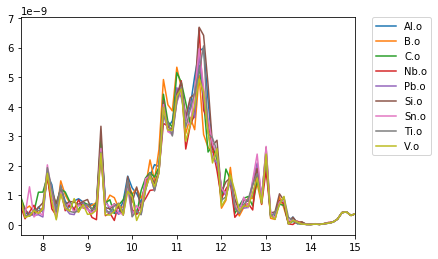

In [35]:
#Outputファイルに入っている.oファイルのスペクトル確認
import os
import matplotlib.pyplot as plt
path = "../Calculate_spectrum/Output1/"
files = os.listdir(path)


for t in files:
#     print(t)
    text_list = []
    spect_x = []
    spect_y = []
    
    f = open(path + t)
    line = f.readline()
    while line:
        line = line.rstrip()
        s = line.split()
        text_list.append(s)
        line = f.readline()
    f.close
        
    for i in range(len(text_list)):
        if len(text_list[i]) == 1:
            if text_list[i][0] == "energy":
                energy = i
    
    for i in range(energy+1,energy+103):
#         print(text_list[i])
        spect_x.append(float(text_list[i][0]))
        spect_y.append(float(text_list[i][1]))
    plt.plot(spect_x,spect_y,label = t)
    
    with open("../Calculate_spectrum/"+str(t.split(".")[0])+"_spectrum.txt", mode = "w") as f:
        for i in range(len(spect_x)):
            if i == 0:
                f.write(str(round(spect_x[i]/2,2)) + "\t" + str(spect_y[i]) + "\n")
            else:
                f.write(str(round((spect_x[i]+spect_x[i-1])/2,2)) + "\t" + str(spect_y[i])+"\n")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.xlim(7.5,15)
# plt.show()
plt.savefig("spectrum.png", format="png", dpi=300,bbox_inches="tight")

    

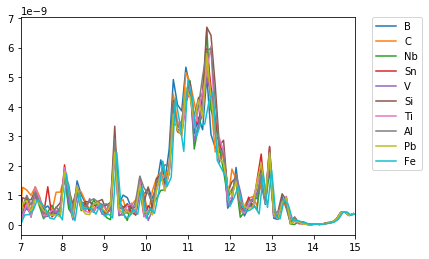

In [64]:
#spectru,.txtを描画

import numpy as np
import matplotlib.pyplot as plt

l1= ["B","C","Nb","Sn","V","Si","Ti","Al","Pb","Fe"]#インプットファイルをつくる元素
# l1= ["B","C","Nb"]#インプットファイルをつくる元素
# l2= ["Sn","V","Si"]
# l3 = ["Ti","Al","Pb",]
# l4 = ["Fe"]
path = "../Calculate_spectrum/"

for i in l1:
    f = open(path + i + "_spectrum.txt")
    line = f.readline()
    x = []
    y = []
    while line:
        x.append(float(line.rstrip().split()[0]))
        y.append(float(line.rstrip().split()[1]))
        line = f.readline()
    f.close
    plt.plot(x,y,label=i)
    
plt.xlim(7,15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.savefig("spect.png", format="png", dpi=300,bbox_inches="tight")


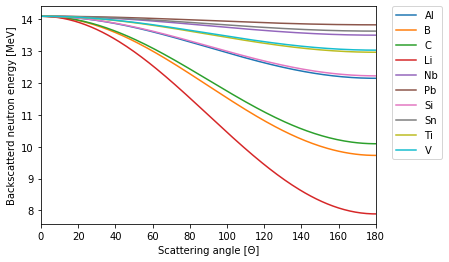

In [27]:
import numpy as np
import matplotlib.pyplot as plt
l = ["Al","B","C","Li","Nb","Pb","Si","Sn","Ti","V"]
ll = [26.9,10.811,12,6.94,92.9,207.2,28.0855,118.71,47.867,50.9415]

Energy_list = []
x = []
for i in range(180):
    x.append(i)
for i in range(len(l)):
    a = []
    for ii in range(181):
        E = 14.1 - 2*ll[i]/(ll[i]+1)**2*(1-np.cos(np.radians(ii)))*14.1
        a.append(E)
    Energy_list.append(a)
        
for i in range(len(Energy_list)):
#     print(i)
    plt.plot(Energy_list[i],label = str(l[i]))
#     print()
    
plt.xlim(0,180)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.xlabel("Scattering angle [Θ]")
plt.ylabel("")
plt.savefig("300_dpi_scatter.png", format="png", dpi=300,bbox_inches="tight")
# print(np.cos(np.radians(180)))